Qa) a) Convert the text corpus into tokens

In [13]:
import pandas as pd
import nltk
nltk.download('punkt')

df = pd.read_csv('/content/Corona_NLP_test.csv', encoding='latin1')

def tokenize_cell(cell):
    return nltk.word_tokenize(cell)

df['OriginalTweet'] = df[['OriginalTweet']].applymap(tokenize_cell)

print(df['OriginalTweet'])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [TRENDING, :, New, Yorkers, encounter, empty, ...
1       [When, I, could, n't, find, hand, sanitizer, a...
2       [Find, out, how, you, can, protect, yourself, ...
3       [#, Panic, buying, hits, #, NewYork, City, as,...
4       [#, toiletpaper, #, dunnypaper, #, coronavirus...
                              ...                        
3793    [Meanwhile, In, A, Supermarket, in, Israel, --...
3794    [Did, you, panic, buy, a, lot, of, non-perisha...
3795    [Asst, Prof, of, Economics, @, cconces, was, o...
3796    [Gov, need, to, do, somethings, instead, of, b...
3797    [I, and, @, ForestandPaper, members, are, comm...
Name: OriginalTweet, Length: 3798, dtype: object


In [15]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Qb) Perform stop word removal.


In [22]:
from nltk.corpus import stopwords

# Download stopwords if necessary
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokenized "OriginalTweet" column
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: [word for word in x if word.lower() not in stop_words])


stop_words = set(nltk.corpus.stopwords.words('english'))

# Remove stopwords from the tokenized "OriginalTweet" column
for i in range(len(df)):
    df.at[i, 'OriginalTweet'] = [word for word in df.at[i, 'OriginalTweet'] if word.lower() not in stop_words]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Qc) Count Word frequencies


In [29]:

from collections import Counter

# Create a list of all the words in the "OriginalTweet" column
all_words = [word for tweet in df['OriginalTweet'] for word in tweet]

# Count the frequency of each word in the list of all words
word_freq = Counter(all_words)

# Print the 20 most common words and their frequencies
print(word_freq.most_common(20))

[('#', 7857), ('.', 4856), (',', 3528), ('?', 2597), (':', 2413), ('https', 1824), ('Covid_19', 1453), ('@', 1242), ('food', 1200), ('coronavirus', 1189), ('store', 974), ('!', 932), ('grocery', 760), ('people', 681), ('stock', 680), (';', 625), ('amp', 610), ('&', 578), ('shopping', 501), ('supermarket', 464)]


Qd)Create word clouds


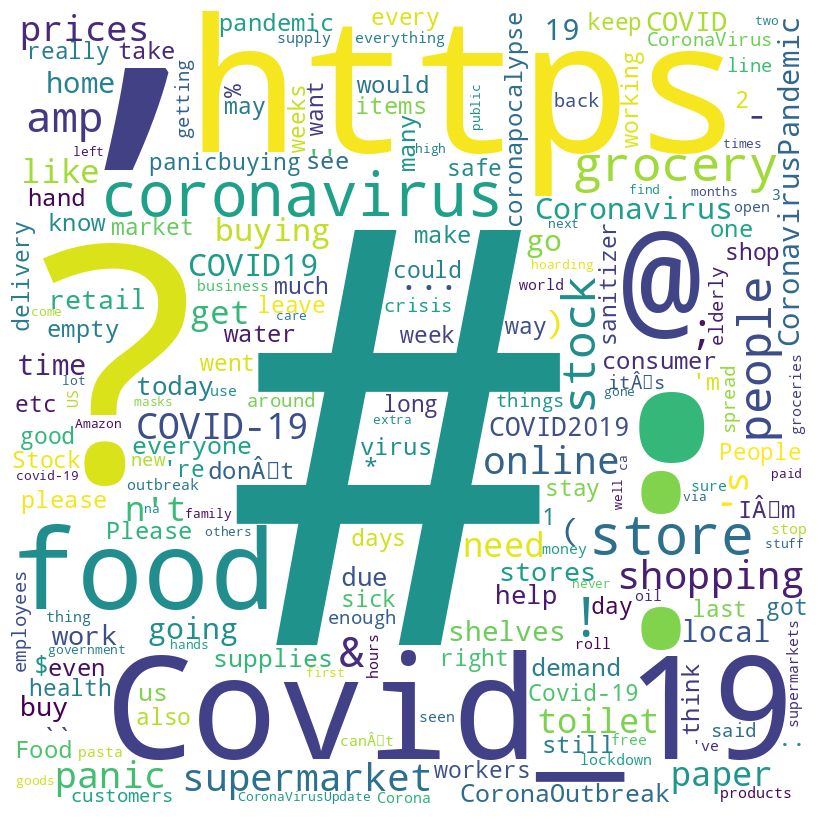

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Create a list of all the words in the "OriginalTweet" column
all_words = [word for tweet in df['OriginalTweet'] for word in tweet]

# Get the frequency of each word in the list of all words
word_freq = dict(Counter(all_words))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()